# ISI FINAL PROJECT
## How to help the music store improve their business?

Ching-Han Kuo (r0911555)  
Dawn Zhuang (r0914937)

# The Chinook Database

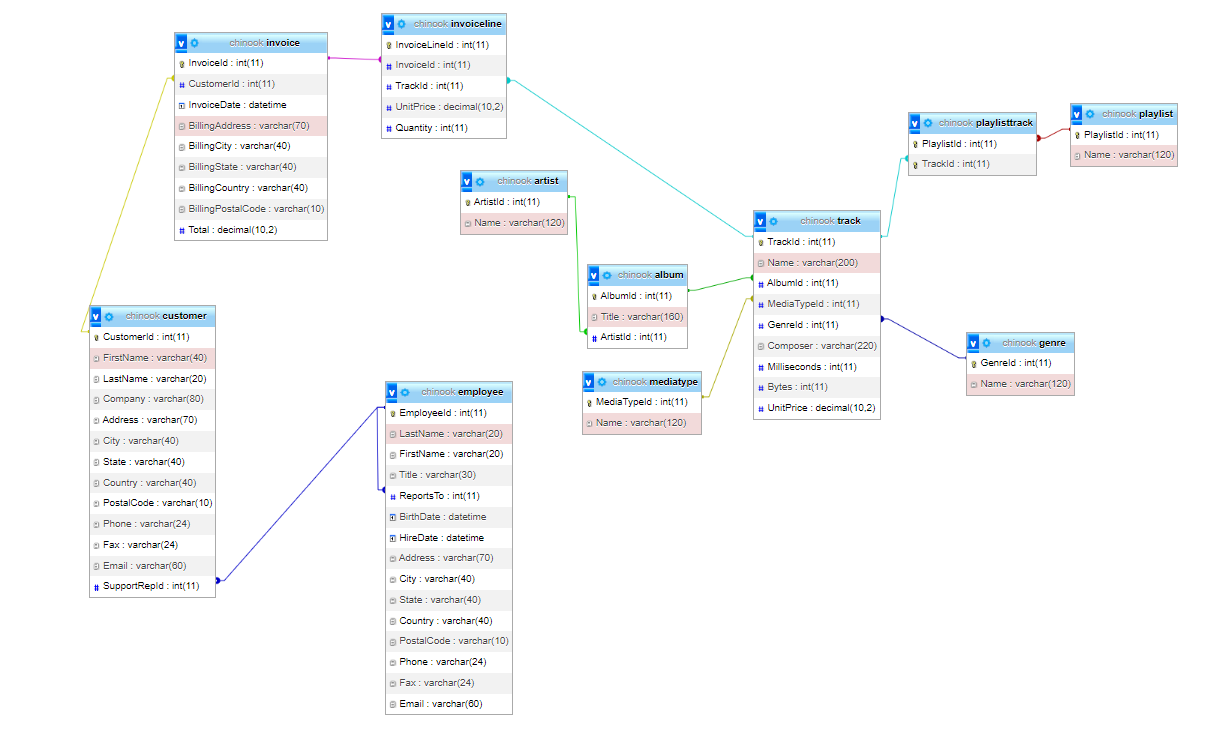

# Preface. Setting

## Preface-1. Set up the connection to the database

In [1]:
# importing the necessary libraries
import mysql.connector 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# defining the credentials
our_username = "root"
our_password = ""
our_host = "localhost" 

# creating the connection to our mysql
conn = mysql.connector.connect(host=our_host, username=our_username, password=our_password)

# creating our database cursor that will allow us to execute SQL queries to our connected database
db_cursor = conn.cursor(buffered=True)

# checking if we are connected and ready to go
if conn.is_connected():
    print("Our connection to our database is successful")
else:
    print("Our connection to our database is unsuccessful")

Our connection to our database is successful


## Preface-2. Use the database we want

In [2]:
# first we select the chinook database
query_select_database = f"USE chinook"

# and then we execute our query
result = db_cursor.execute(query_select_database)

# Introduction

The globalised trend in streaming music platforms in recent years makes it more and more difficult for music stores, no matter in online or off-line mode, to make profits from the booming music industry. Therefore, it is crucial for a music store to have a comprehensive reflection on its management, sales, stock and customer to better run its business.

This report tries to find out the potential weak points of a music store and to provide some advice for improvement based on the information in the Chinook Database. The structure of the report consists of three parts:


* Human Resource Reflection: In this part, queries about the sales performance of individual employees and average total sales each day in a week during 2009-2013 has been provided. And analysis of the factors impacting employees' sales performance and advice on shift arrangement has been made.


* Control of Storage: In this part, queries about the trend in the sales of music products are provided. Specifically, most unpopular albums, artists and genres are listed. And the relationships between the sales of music products and the playlists, variety of purchased artists in different countries, track length and quantity of tracks in an album has been explored.



* Customer Filtering: In this part, queries about customers' average expense, and consumer behaviour are provided.

Some advice was made based on the findings, however, some problems were detected in the database during our exploration, which may jeopardise the reliability of the information in this database.


# 1. Human Resource Reflection

## Q1 

### Compare the sales performance of employees of each year

In the beginning of our exploration on human resource reflection, we want to have an overview of the sales statistics per employee per year, and find out the employee who sold the least in each year, in order to analyse the different factors that may impact employee's sales performance and find the weak point that can be improved.  

In [3]:
# sales performance of each sales employee grouped by year
query1 = """
    SELECT YEAR(i.InvoiceDate) Year, 
           e.EmployeeId, 
           e.FirstName, 
           e.LastName, 
           COUNT(i.InvoiceId) InvoiceCount,
           SUM(i.Total) SalesTotal
    FROM employee e
    JOIN customer c
    ON e.EmployeeId = c.SupportRepId
    JOIN invoice i
    ON c.CustomerId = i.CustomerId
    GROUP BY Year, e.EmployeeId
    ORDER BY Year DESC, SalesTotal DESC
"""

df1 = pd.read_sql(query1, conn)

df1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Year,EmployeeId,FirstName,LastName,InvoiceCount,SalesTotal
0,2013,4,Margaret,Park,26,168.30
1,2013,3,Jane,Peacock,31,156.43
2,2013,5,Steve,Johnson,23,125.85
3,2012,4,Margaret,Park,29,197.20
4,2012,3,Jane,Peacock,28,146.60
5,2012,5,Steve,Johnson,26,133.73
6,2011,3,Jane,Peacock,28,184.34
7,2011,5,Steve,Johnson,27,159.47
8,2011,4,Margaret,Park,28,125.77
9,2010,3,Jane,Peacock,34,221.92


In [4]:
df1_plot = df1[['Year','FirstName','SalesTotal']].pivot(
    index='Year',
    columns='FirstName',
    values='SalesTotal'
)

df1_plot

FirstName,Jane,Margaret,Steve
Year,,,
2009,123.75,161.37,164.34
2010,221.92,122.76,136.77
2011,184.34,125.77,159.47
2012,146.60,197.20,133.73
2013,156.43,168.30,125.85


[<AxesSubplot:title={'center':'SalesComparisonByYear'}, ylabel='Year'>]

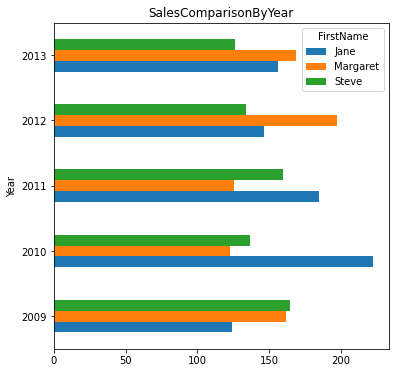

In [5]:
df1_plot = [df1_plot
             .plot
             .barh(figsize=(6,6), 
              title = 'SalesComparisonByYear')]

df1_plot

In [6]:
# find out the sales employee with the least sales each year
query1_2_1 = """ 
    WITH SalesList (Year, EmployeeId, FirstName, LastName, InvoiceCount, Rank, SalesTotal, Age, HireYear, Nationality) 
    AS (SELECT Year(i.InvoiceDate) Year, 
               e.EmployeeId, 
               e.FirstName, 
               e.LastName,
               COUNT(i.InvoiceID) InvoiceCount, 
               RANK() OVER(PARTITION BY Year ORDER BY SalesTotal) Rank,
               SUM(i.Total) SalesTotal,
               (DATEDIFF(MAX(DATE(i.InvoiceDate)), e.BirthDate)/365) Age,
               (DATEDIFF(MAX(DATE(i.InvoiceDate)), e.HireDate)/365) HireYear,
               e.Country Nationailty
        FROM employee e 
        JOIN customer c 
        ON e.EmployeeId = c.SupportRepId 
        JOIN invoice i 
        ON c.CustomerId = i.CustomerId 
        GROUP BY Year, e.EmployeeId 
        ORDER BY Year DESC, InvoiceCount) 
    SELECT Year, 
           EmployeeId, 
           LastName, 
           FirstName, 
           InvoiceCount,
           SalesTotal,
           Age,
           HireYear,
           Nationality
    FROM SalesList 
    WHERE Rank = 1
""" 

df1_2_1 = pd.read_sql(query1_2_1, conn)

df1_2_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Year,EmployeeId,LastName,FirstName,InvoiceCount,SalesTotal,Age,HireYear,Nationality
0,2013,5,Johnson,Steve,23,125.85,48.7918,10.1425,Canada
1,2012,5,Johnson,Steve,26,133.73,47.7836,9.1342,Canada
2,2011,4,Park,Margaret,28,125.77,64.3068,8.6493,Canada
3,2010,4,Park,Margaret,27,122.76,63.2877,7.6301,Canada
4,2009,3,Peacock,Jane,25,123.75,36.3507,7.7425,Canada


After generating a list of the employees with the least sales each year, we want to further explore the underlying reason for relatively worse performance in selling. Apparently they all have the same nationality and it can be exempted from the relevant factors. We will have a closer overview on if the age, employment duration, number of customers they served, nationalities of the customers they served and genre of music they sold are correlated to the sales performance of an employee.

In [7]:
# extract information of possible impacting fators and sales performance of each employee
query1_2_2 = """
    SELECT Year(i.InvoiceDate) Year,
           e.EmployeeId, 
           e.LastName,   
           (DATEDIFF(SYSDATE(), e.BirthDate)/365) Age,
           (DATEDIFF(SYSDATE(), e.HireDate)/365) HireYear,
           COUNT(DISTINCT i.CustomerId) CustomerCount,
           COUNT(DISTINCT c.Country) CustomerCountryCount,
           COUNT(DISTINCT tr.GenreId) GenreCount,
           SUM(il.UnitPrice * il.Quantity) TotalSale
    FROM employee e
    JOIN customer c
    ON c.SupportRepId = e.EmployeeId
    JOIN invoice i
    ON i.CustomerId = c.CustomerId
    JOIN invoiceline il
    ON i.InvoiceId = il.InvoiceId
    JOIN track tr
    ON tr.TrackId = il.TrackId
    JOIN genre g
    ON tr.GenreId = g.GenreId
    GROUP BY Year, e.EmployeeId
    ORDER BY Year DESC, TotalSale DESC
"""
df1_2_2 = pd.read_sql(query1_2_2, conn)

df1_2_2

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Year,EmployeeId,LastName,Age,HireYear,CustomerCount,CustomerCountryCount,GenreCount,TotalSale
0,2013,4,Park,75.3041,19.6466,16,11,12,168.30
1,2013,3,Peacock,49.3425,20.7342,17,10,10,156.43
2,2013,5,Johnson,57.8384,19.1890,13,10,13,125.85
3,2012,4,Park,75.3041,19.6466,17,10,17,197.20
4,2012,3,Peacock,49.3425,20.7342,16,9,15,146.60
5,2012,5,Johnson,57.8384,19.1890,14,10,14,133.73
6,2011,3,Peacock,49.3425,20.7342,17,9,14,184.34
7,2011,5,Johnson,57.8384,19.1890,13,9,16,159.47
8,2011,4,Park,75.3041,19.6466,17,10,12,125.77
9,2010,3,Peacock,49.3425,20.7342,16,8,20,221.92


In [8]:
# caculate the correlation coefficient between employee's sales and possible impacting fators
print('Correlation coefficient between: ', '\n',
      '  Age and Sales Performance: ', df1_2_2['Age'].corr(df1_2_2['TotalSale']),'\n',
      '  Employee duration and Sales Performance: ', df1_2_2['HireYear'].corr(df1_2_2['TotalSale']),'\n',
      '  Customer Quantity and Sales Performance: ',df1_2_2['CustomerCount'].corr(df1_2_2['TotalSale']),'\n',
      '  Customer Nationality and Sales Performance: ',df1_2_2['CustomerCountryCount'].corr(df1_2_2['TotalSale']),'\n',
      '  Music Genre and Sales Performance: ',df1_2_2['GenreCount'].corr(df1_2_2['TotalSale']))

Correlation coefficient between:  
   Age and Sales Performance:  -0.1082685360626422 
   Employee duration and Sales Performance:  0.3178227859637193 
   Customer Quantity and Sales Performance:  0.4652964006962829 
   Customer Nationality and Sales Performance:  -0.27110583390927384 
   Music Genre and Sales Performance:  0.6572929476399552


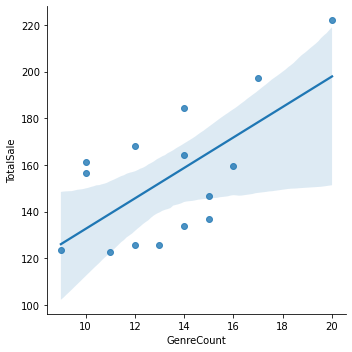

In [9]:
sns.lmplot(x='GenreCount', y='TotalSale', data=df1_2_2)

The correlation coefficient results show that the age, employment duration, number of customers they served, nationalities of the customers have no strong correlation with the sales an employee made. While to some extent, the less genre an employee promoted, the less sales outcome he/she will make. It is advised to encourage sales employees to promote more varieties of music genres to customers to increase the probability of making higher sales.

## Q2

### A better way to assign shifts to employees

We will use the average sales of each day within a week during the period of this database to determine which day in a week could be a potential day off for the store. 

In [10]:
# find the average sales and invoice quantity for each day in a week
query2_1 = """  
    SELECT DAYNAME(InvoiceDate) WeekDay, 
           SUM(Total)/COUNT(DISTINCT(InvoiceDate)) AvgSales, 
           COUNT(*)/COUNT(DISTINCT(InvoiceDate)) AvgInvoiceQuantity 
    FROM invoice 
    GROUP BY WeekDay
    ORDER BY WEEKDAY(InvoiceDate)
"""  

df2_1 = pd.read_sql(query2_1, conn)

df2_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,WeekDay,AvgSales,AvgInvoiceQuantity
0,Monday,6.408235,1.1569
1,Tuesday,6.436200,1.1600
2,Wednesday,6.975600,1.1800
3,Thursday,6.527255,1.1569
4,Friday,6.407255,1.1569
5,Saturday,6.595200,1.1600
6,Sunday,6.701373,1.1765


From the table, the difference between each day is not obvious. But when putting it in the line graph, the trend is clear that the sales peak happens on Wednesday and the weekend, and Monday and Friday have the lowest sales.

array([<AxesSubplot:xlabel='WeekDay'>, <AxesSubplot:xlabel='WeekDay'>],
      dtype=object)

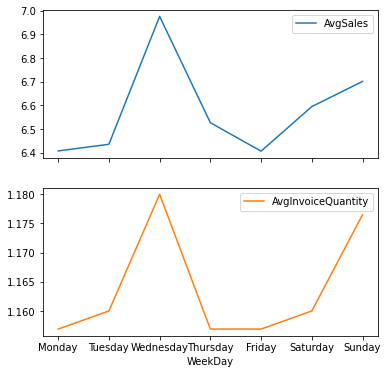

In [11]:
df2_1 = df2_1.set_index('WeekDay')

df2_1.plot.line(subplots=True, figsize=(6, 6))

From this finding, we suggest that the official day off for the store could be on Monday or Friday, and when assigning shifts, the employees should not take a day off on Wednesday and should work at least one day on the weekend.

# 2. Control of the Storage

## Q3

### (1) An overview of the music production sales

With an overview of the track sold situation, we found that almost half of the track in storage has never been sold, which indicates the storage of music products needs a careful evaluation to help have a better control of the storage. 

In [12]:
# calculate the proportion of sold tracks
query3_1 = """
    SELECT COUNT(DISTINCT il.TrackId) SoldCount, 
           COUNT(DISTINCT t.TrackId) - COUNT(DISTINCT il.TrackId) UnsoldCount,
           COUNT(DISTINCT t.TrackId) TotalTrack,
           ROUND(COUNT(DISTINCT il.TrackId)/COUNT(DISTINCT t.TrackId)*100, 2) SoldPercentage, 
           100-ROUND(COUNT(DISTINCT il.TrackId)/COUNT(DISTINCT t.TrackId)*100, 2) UnsoldPercentage
    FROM track t
    LEFT JOIN invoiceline il
    ON t.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON il.InvoiceId = i.InvoiceId
"""

df3_1 = pd.read_sql(query3_1, conn)   

df3_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SoldCount,UnsoldCount,TotalTrack,SoldPercentage,UnsoldPercentage
0,1984,1519,3503,56.64,43.36


<AxesSubplot:title={'center':'TrackSoldSituation'}, ylabel=' '>

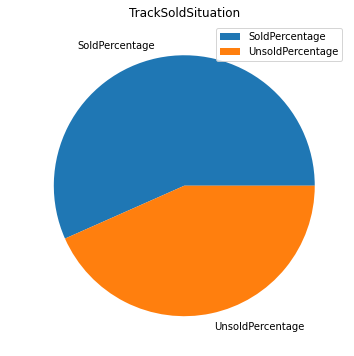

In [13]:
df3_1_plot = df3_1[['SoldPercentage', 'UnsoldPercentage']]
df3_1_plot = df3_1_plot.transpose().rename(columns = {0:' '})
df3_1_plot.plot.pie(y = 0, figsize=(6,6), title = 'TrackSoldSituation')

### (2) Find the album that sells the least

Firstly, we will have a look at which album sells the least. There appears to be 43 albums (12.39% of the total albums in storage), were unsold in 5 years, which means they were not interested by our customer groups, therefore, it is advised to arrange a clearance sale on these albums, and no longer purchase them for stock in the future.

In [14]:
# calculate the proportion of sold albums
query3_2 ="""
    WITH AlbumList (AlbumId, AlbumName, Count)
    AS (SELECT a.AlbumId Id, 
               a.Title AlbumName, 
               COUNT(il.Quantity) Count
        FROM album a
        LEFT JOIN track t
        ON a.AlbumId = t.AlbumId
        LEFT JOIN invoiceline il
        ON t.TrackId = il.TrackId
        LEFT JOIN invoice i
        ON il.InvoiceId = i.InvoiceId
        GROUP BY a.AlbumId)
    SELECT Count(DISTINCT AlbumId) - Count(CASE WHEN Count = 0 THEN Count END) SoldTotal,
           Count(CASE WHEN Count = 0 THEN Count END) UnsoldTotal,
           Count(DISTINCT AlbumId) AlbumTotal,
           100-ROUND(Count(CASE WHEN Count = 0 THEN Count END)/COUNT(*)*100, 2) SoldPercentage, 
           ROUND(Count(CASE WHEN Count = 0 THEN Count END)/COUNT(*)*100, 2) UnsoldPercentage
    FROM AlbumList
"""

df3_2 = pd.read_sql(query3_2, conn)

df3_2

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SoldTotal,UnsoldTotal,AlbumTotal,SoldPercentage,UnsoldPercentage
0,304,43,347,87.61,12.39


<AxesSubplot:title={'center':'AlbumSoldSituation'}, ylabel=' '>

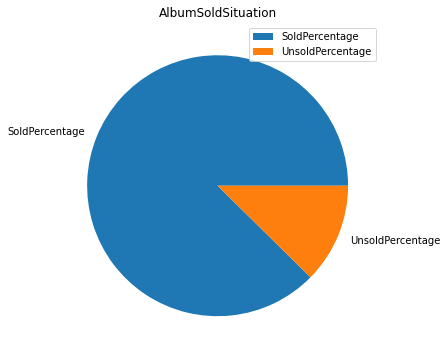

In [15]:
df3_2_plot = df3_2[['SoldPercentage', 'UnsoldPercentage']]
df3_2_plot = df3_2_plot.transpose().rename(columns = {0:' '})
df3_2_plot.plot.pie(y = 0, figsize=(6,6), title = 'AlbumSoldSituation')

In [16]:
# extract the list of unsold albums
query3_2_1 = """ 
    SELECT a.Title AlbumName, 
           COUNT(il.Quantity) Count 
    FROM album a
    LEFT JOIN track t
    ON a.AlbumId = t.AlbumId
    LEFT JOIN invoiceline il
    ON t.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON il.InvoiceId = i.InvoiceId
    LEFT JOIN genre g
    ON t.GenreId = g.GenreId
    GROUP BY a.AlbumId
    HAVING Count = 0
"""

df3_2_1 = pd.read_sql(query3_2_1, conn)

df3_2_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,AlbumName,Count
0,Battlestar Galactica: The Story So Far,0
1,Cake: B-Sides and Rarities,0
2,Quiet Songs,0
3,Realize,0
4,Worlds,0
5,The Best of Beethoven,0
6,Adorate Deum: Gregorian Chant from the Proper ...,0
7,Allegri: Miserere,0
8,Vivaldi: The Four Seasons,0
9,Bach: Violin Concertos,0


### (3) Find the artist who produced most unwanted albums

And secondly, we will have a look at which artist produced the most unwanted albums. There appears to be 39 Artists produced albums that have never been sold in 5 years. It indicates that productions of these artists do not meet the taste of our customers, and it is advised no longer purchase music production of them for stock in the future.

In [17]:
# extract the List of artists who produced most unwanted albums
query3_2_2 = """
    SELECT ar.Name Name, 
           COUNT(il.Quantity) SaleAmount, 
           COUNT(DISTINCT t.TrackId) TrackAmount, 
           COUNT(a.AlbumId) AlbumAmount
    FROM artist ar
    LEFT JOIN album a
    ON ar.ArtistId = a.ArtistId
    LEFT JOIN track t
    ON a.AlbumId = t.AlbumId
    LEFT JOIN invoiceline il
    ON t.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON il.InvoiceId = i.InvoiceId
    GROUP BY a.ArtistId
    HAVING SaleAmount = 0 AND AlbumAmount <> 0
    ORDER BY AlbumAmount DESC, Name
"""   

df3_2_2 = pd.read_sql(query3_2_2, conn)   

df3_2_2

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Name,SaleAmount,TrackAmount,AlbumAmount
0,Aisha Duo,0,2,2
1,Karsh Kale,0,2,2
2,Aaron Copland & London Symphony Orchestra,0,1,1
3,Aaron Goldberg,0,1,1
4,Academy of St. Martin in the Fields Chamber En...,0,1,1
5,Alberto Turco & Nova Schola Gregoriana,0,1,1
6,"Anne-Sophie Mutter, Herbert Von Karajan & Wien...",0,1,1
7,Barry Wordsworth & BBC Concert Orchestra,0,1,1
8,"Berliner Philharmoniker, Claudio Abbado & Sabi...",0,1,1
9,Boston Symphony Orchestra & Seiji Ozawa,0,1,1


## Q4

### The least popular genre

We would like to see the selling situation of each genre. We will compare the proportion of tracks being sold in each genre (i.e., the number of tracks being sold in a genre divided by the number of total tracks in a genre). 

In [18]:
# calculate the sales propotion in each genre and sort the results
query4 = """ 
    WITH TrackList (TrackId, Count, Genre) 
    AS (SELECT t.TrackId TrackId, 
               COUNT(DISTINCT il.TrackId) Count, 
               g.Name Genre 
        FROM track t 
        LEFT JOIN invoiceline il 
        ON t.TrackId = il.TrackId 
        LEFT JOIN invoice i 
        ON il.InvoiceId = i.InvoiceId 
        LEFT JOIN genre g 
        ON t.GenreId = g.GenreId 
        GROUP BY t.TrackId) 
    SELECT DISTINCT Genre, 
           ROUND(SUM(Count)OVER(PARTITION BY Genre)/COUNT(*)OVER(PARTITION BY Genre)*100, 2) SalePercentage, 
           CAST(SUM(Count)OVER(PARTITION BY Genre) AS INT) SoldTrack, 
           COUNT(*)OVER(PARTITION BY Genre) TotalTrack
    FROM TrackList 
    ORDER BY SalePercentage DESC 
""" 

df4 = pd.read_sql(query4, conn)

df4

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Genre,SalePercentage,SoldTrack,TotalTrack
0,Bossa Nova,93.33,14,15
1,Sci Fi & Fantasy,76.92,20,26
2,Blues,65.43,53,81
3,Metal,61.76,231,374
4,Alternative & Punk,61.14,203,332
5,R&B/Soul,60.66,37,61
6,Latin,58.72,340,579
7,Rock,57.44,745,1297
8,Pop,54.17,26,48
9,Jazz,52.31,68,130


[<AxesSubplot:title={'center':'Genre Sale Portion'}, xlabel='Genre'>]

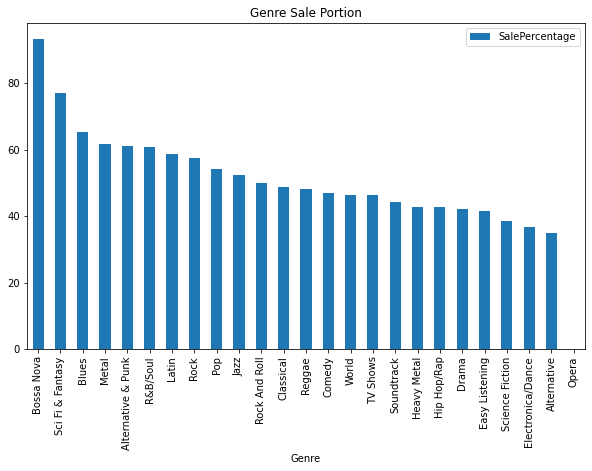

In [19]:
df4_plot = [df4
              .set_index('Genre')
              .plot.bar(y = 'SalePercentage', figsize=(10, 6), 
                        title = 'Genre Sale Portion') 
             ]

df4_plot

However, we can see there are problems with genres in this database. For example, we can see there are genres like ‘Rock’ and ‘Rock And Roll’, or ‘Sci Fi & Fantasy’ and ‘Science Fiction’, which should be the same genre. Another issue is that ‘Sci Fi & Fantasy’, ‘TV Shows’, and ‘Science Fiction’ can all be a sub-genre of ‘Soundtrack’. Furthermore, we found that the tracks of the same album ‘The Office, Season 3’ were categorised under different genres, which should not be the case.

In [20]:
# example of the tracks in the album "The Office, Season 3" categorised under different genres
query4_1 = """
    SELECT a.Title AlbumName, 
           a.AlbumId AlbumId, 
           t.GenreId, 
           g.Name
    FROM album a
    LEFT JOIN track t
    ON a.AlbumId = t.AlbumId
    LEFT JOIN invoiceline il
    ON t.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON il.InvoiceId = i.InvoiceId
    LEFT JOIN genre g
    ON t.GenreId = g.GenreId
    WHERE a.AlbumId = 251
"""

df4_1 = pd.read_sql(query4_1, conn)

df4_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,AlbumName,AlbumId,GenreId,Name
0,"The Office, Season 3",251,19,TV Shows
1,"The Office, Season 3",251,19,TV Shows
2,"The Office, Season 3",251,19,TV Shows
3,"The Office, Season 3",251,19,TV Shows
4,"The Office, Season 3",251,19,TV Shows
5,"The Office, Season 3",251,19,TV Shows
6,"The Office, Season 3",251,19,TV Shows
7,"The Office, Season 3",251,19,TV Shows
8,"The Office, Season 3",251,19,TV Shows
9,"The Office, Season 3",251,22,Comedy


Therefore, we would suggest that in the future, the store should develop a proper categorical system of genres, or the result of the analysis could be questionable. Nevertheless, we can get a conclusion from the table that tracks with the genre ‘Hip Hop/Rap’, or ‘Electronica/Dance’ have a lower proportion of sales, and those genres are considered preferable for the younger generation. Therefore, our second suggestion is that the store can dig into its consumer profile like age (which is not included in this database) to understand its target audience better and import tracks with proper genres accordingly.

## Q5

### Relationship between playlist setting the sales

Next, we will explore if playlist setting impact the profits, to help us review our music product storage. After generating the sales information of playlist, we found the categorisation seems problematic. On the one hand, there are duplicated playlist records with different identifier in the database. 

In [21]:
# list the duplicated playlists with different indentifiers in the database
query5 = """ 
    WITH PlaylistInfo (PlaylistId, PlaylistName, SalesAmount, TotalAmount, Percentage, Sales)
    AS (SELECT pl.PlaylistId PlaylistId,
           pl.Name PlaylistName, 
           SUM(il.Quantity) SalesAmount, 
           COUNT(DISTINCT t.TrackId) TotalAmount, 
           ROUND(SUM(il.Quantity)/COUNT(DISTINCT t.TrackId)*100, 2) Percentage, 
           SUM(il.UnitPrice * il.Quantity) Sales
    FROM playlist pl 
    LEFT JOIN playlisttrack pt 
    ON pl.PlaylistId = pt.PlaylistId 
    LEFT JOIN track t 
    ON pt.TrackId = t.TrackId 
    LEFT JOIN invoiceline il 
    ON t.TrackId = il.TrackId 
    LEFT JOIN invoice i 
    ON il.InvoiceId = i.InvoiceId 
    GROUP BY pl.PlaylistId 
    ORDER BY Percentage DESC)
    SELECT * 
    FROM PlaylistInfo
    WHERE PlaylistName in (
          SELECT PlaylistName FROM PlaylistInfo
          GROUP BY PlaylistName
          HAVING COUNT(PlaylistId) > 1)
    ORDER BY PlaylistName DESC, PlaylistId
""" 

df5 = pd.read_sql(query5, conn) 

df5

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,PlaylistId,PlaylistName,SalesAmount,TotalAmount,Percentage,Sales
0,3,TV Shows,111.0,213,52.11,220.89
1,10,TV Shows,111.0,213,52.11,220.89
2,1,Music,2129.0,3290,64.71,2107.71
3,8,Music,2129.0,3290,64.71,2107.71
4,2,Movies,NaN,0,NaN,NaN
5,7,Movies,NaN,0,NaN,NaN
6,4,Audiobooks,NaN,0,NaN,NaN
7,6,Audiobooks,NaN,0,NaN,NaN


And on the other hand, the playlist "Music" seems too general that has included almost all tracks (3290 out of 3503) in the storage. Nevertheless, the top 3 playlists ("Heavy Metal Classic '', "Classical 101 - Deep Cuts", "Brazilian Music") with the highest selling percentages are all playlists of a specific categorisation. So it is advised to revise the duplicated records in playlists, and more importantly, work on a thorough categorisation, which can help the tracks to be sold.

In [22]:
# calculate the profits each playlist made, sorted by sold percentage
query5_1 = """ 
    SELECT DISTINCT pl.Name PlaylistName, 
           SUM(il.Quantity) SalesAmount, 
           COUNT(DISTINCT t.TrackId) TotalAmount, 
           ROUND(SUM(il.Quantity)/COUNT(DISTINCT t.TrackId)*100, 2) Percentage, 
           SUM(il.UnitPrice * il.Quantity) Sales 
    FROM playlist pl 
    LEFT JOIN playlisttrack pt 
    ON pl.PlaylistId = pt.PlaylistId 
    LEFT JOIN track t 
    ON pt.TrackId = t.TrackId 
    LEFT JOIN invoiceline il 
    ON t.TrackId = il.TrackId 
    LEFT JOIN invoice i 
    ON il.InvoiceId = i.InvoiceId 
    GROUP BY pl.PlaylistId 
    ORDER BY Percentage DESC
""" 

df5_1 = pd.read_sql(query5_1, conn) 

df5_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,PlaylistName,SalesAmount,TotalAmount,Percentage,Sales
0,Heavy Metal Classic,22.0,26,84.62,21.78
1,Classical 101 - Deep Cuts,19.0,25,76.00,18.81
2,Brazilian Music,27.0,39,69.23,26.73
3,Music,2129.0,3290,64.71,2107.71
4,90’s Music,954.0,1477,64.59,944.46
5,Classical 101 - Next Steps,15.0,25,60.00,14.85
6,Classical,41.0,75,54.67,40.59
7,TV Shows,111.0,213,52.11,220.89
8,Grunge,7.0,15,46.67,6.93
9,Classical 101 - The Basics,7.0,25,28.00,6.93


array([<AxesSubplot:title={'center':'Percentage'}, xlabel='PlaylistName'>,
       <AxesSubplot:title={'center':'Sales'}, xlabel='PlaylistName'>],
      dtype=object)

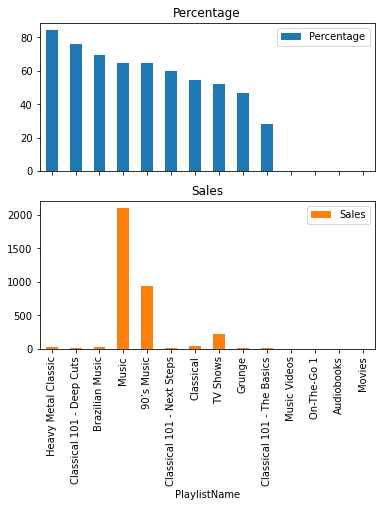

In [23]:
df5_1_plot = df5_1[['PlaylistName', 'Percentage', 'Sales']].set_index('PlaylistName')

df5_1_plot = df5_1_plot.plot.bar(subplots = True, figsize=(6, 6))

df5_1_plot

## Q6

### Relationship between sales and the variety of purchased artists in different countries

In this part, we look at if there would be more sales in a country if customers in that country bought tracks from more different artists. We first built a table containing the number of purchased artists and the sales, then we see their correlation and draw a graph of the result of linear regression.

In [24]:
# extract the number of purchased artists and the sales in different countries
query6 = """ 
    WITH CountryList (CustomerId, Country, Artist, SalesAmount, Profit) 
    AS (SELECT c.CustomerId, 
               c.Country, 
               at.Name, 
               Sum(il.Quantity) Count, 
               SUM(il.Quantity * il.UnitPrice) Profit
        FROM artist at 
        LEFT JOIN album ab 
        ON at.ArtistId = ab.ArtistId 
        LEFT JOIN track t 
        ON ab.AlbumId = t.AlbumId 
        LEFT JOIN invoiceline il 
        ON t.TrackId = il.TrackId 
        LEFT JOIN invoice i 
        ON il.InvoiceId = i.InvoiceId 
        LEFT JOIN customer c 
        ON i.CustomerId = c.CustomerId 
        GROUP BY c.Country, at.ArtistId 
        HAVING Count <> 0) 
    SELECT Country, COUNT(DISTINCT Artist) ArtistAmount, SUM(Profit) Sales
    FROM CountryList
    GROUP BY Country
    ORDER BY Sales DESC
    """

df6 = pd.read_sql(query6, conn) 

df6

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Country,ArtistAmount,Sales
0,USA,105,523.06
1,Canada,91,303.96
2,France,69,195.10
3,Brazil,60,190.10
4,Germany,42,156.48
5,United Kingdom,41,112.86
6,Czech Republic,24,90.24
7,Portugal,25,77.24
8,India,31,75.26
9,Chile,15,46.62


In [25]:
correlation_df6 = df6['ArtistAmount'].corr(df6['Sales'])
correlation_df6

0.9568585415305733

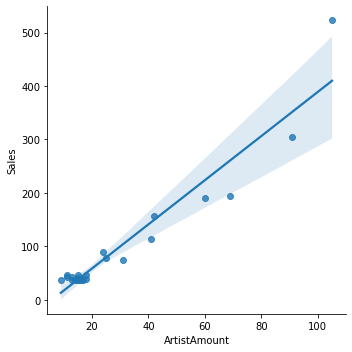

In [26]:
df6_plot = sns.lmplot(x='ArtistAmount', y='Sales', data=df6)

df6_plot

It looks like there is a positive correlation between the variety of artists a customer buys and profitability, therefore, we suggest that in the countries with lower sales, the store can launch a system or campaign to recommend similar types of artists to the customer.

## Q7 

### Relationship between the length of track the profit it can make

To find the captioned relation, firstly we need to detect if there is a significant difference in the length of tracks between the sold and unsold tracks. As the result shows below, the pvalue of the length of sold and unsold tracks is 0.17191036836432805 > 0.05, it indicates that there is no significant difference in the length of tracks between the sold and unsold tracks in statistics.

In [27]:
# list the length in milliseconds and sales of all sold tracks
query7_1 = """ 
    SELECT tr.TrackId, 
           tr.Milliseconds SoldLength, 
           SUM(il.UnitPrice * il.Quantity) Sales
    FROM track tr
    LEFT JOIN invoiceline il
    ON tr.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON i.InvoiceId = il.InvoiceId
    GROUP BY tr.TrackId
    HAVING Sales <> 'NaN'
    ORDER BY Sales DESC
""" 

df7_1 = pd.read_sql(query7_1, conn) 

df7_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,TrackId,SoldLength,Sales
0,3214,1271521,3.98
1,3223,2687103,3.98
2,2832,2626376,3.98
3,3200,1326534,3.98
4,3177,1325458,3.98
...,...,...,...
1979,2253,410409,0.99
1980,213,144326,0.99
1981,2261,228832,0.99
1982,221,307252,0.99


In [28]:
# list the length of all unsold tracks
query7_2 = """
    SELECT tr.TrackId,
           tr.Milliseconds UnSoldLength, 
           COUNT(il.TrackId) Count
    FROM track tr 
    LEFT JOIN invoiceline il 
    ON tr.TrackId = il.TrackId 
    LEFT JOIN invoice i 
    ON i.InvoiceId = il.InvoiceId
    GROUP BY tr.TrackId
    HAVING Count = 0
"""
df7_2 = pd.read_sql(query7_2, conn) 

df7_2

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,TrackId,UnSoldLength,Count
0,7,233926,0
1,11,199836,0
2,17,366654,0
3,18,267728,0
4,22,323761,0
...,...,...,...
1514,3497,261849,0
1515,3498,493573,0
1516,3501,66639,0
1517,3502,221331,0


In [29]:
# caculate the t-test result between the length of sold and unsold tracks
from scipy.stats import ttest_ind

sample_1 = df7_1["SoldLength"].values.tolist()
sample_2 = df7_2["UnSoldLength"].values.tolist()

res = ttest_ind(sample_1, sample_2)

print(res)

Ttest_indResult(statistic=-1.3663707665578615, pvalue=0.17191036836432805)


## Q8

### Relationship between the quantity of tracks in an album and its sales

In this part, we would like to check if the quantity of tracks in an album impacts the profit it can make. First, we need to detect if there is a significant difference in the number of tracks between the albums that have been sold and not been sold. The result is shown below and there is a significant difference.

In [30]:
# list the number of tracks in albums that have been sold
query8_1 = """  
    SELECT al.AlbumId,  
           COUNT(DISTINCT tr.TrackId) TrackCount,
           SUM(il.UnitPrice * il.Quantity) Sales
    FROM album al
    LEFT JOIN track tr
    ON al.AlbumId = tr.AlbumId
    LEFT JOIN invoiceline il
    ON tr.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON i.InvoiceId = il.InvoiceId
    GROUP BY al.AlbumId
    HAVING Sales <> 'NaN'
    ORDER BY TrackCount DESC
"""  

df8_1 = pd.read_sql(query8_1, conn)

df8_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,AlbumId,TrackCount,Sales
0,141,57,25.74
1,23,34,26.73
2,73,30,24.75
3,229,26,21.89
4,230,25,19.90
...,...,...,...
299,324,1,0.99
300,337,1,0.99
301,254,1,3.98
302,299,1,1.98


In [31]:
# list the number of tracks in albums that have not been sold
query8_2 = """  
    SELECT al.AlbumId,  
           COUNT(DISTINCT tr.TrackId) TrackCount,
           COUNT(il.InvoiceId) Count
    FROM album al
    LEFT JOIN track tr
    ON al.AlbumId = tr.AlbumId
    LEFT JOIN invoiceline il
    ON tr.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON i.InvoiceId = il.InvoiceId
    GROUP BY al.AlbumId
    HAVING Count = 0
    ORDER BY TrackCount DESC
"""  

df8_2 = pd.read_sql(query8_2, conn)

df8_2

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,AlbumId,TrackCount,Count
0,264,2,0
1,262,2,0
2,317,1,0
3,285,1,0
4,328,1,0
5,296,1,0
6,339,1,0
7,275,1,0
8,318,1,0
9,286,1,0


In [32]:
# caculate the t-test result between the number of tracks of sold and unsold albums
import numpy as np
from scipy.stats import ttest_ind

sample_3 = df8_1["TrackCount"].values.tolist()
sample_4 = df8_2["TrackCount"].values.tolist()

res = ttest_ind(sample_3, sample_4)

print(res)

Ttest_indResult(statistic=10.33146983383072, pvalue=5.593486382465615e-22)


Then, we calculate the correlation and draw the graph of linear regression. The result shows that there is a positive correlation between the number of tracks in an album and its sales.

In [33]:
query8_3 = """  
    SELECT al.AlbumId,  
           COUNT(DISTINCT tr.TrackId) TrackCount,
           SUM(il.UnitPrice * il.Quantity) Sales
    FROM album al
    LEFT JOIN track tr
    ON al.AlbumId = tr.AlbumId
    LEFT JOIN invoiceline il
    ON tr.TrackId = il.TrackId
    LEFT JOIN invoice i
    ON i.InvoiceId = il.InvoiceId
    GROUP BY al.AlbumId
    ORDER BY TrackCount DESC
"""  

df8_3 = pd.read_sql(query8_3, conn)

df8_3

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,AlbumId,TrackCount,Sales
0,141,57,25.74
1,23,34,26.73
2,73,30,24.75
3,229,26,21.89
4,230,25,19.90
...,...,...,...
342,286,1,NaN
343,318,1,NaN
344,267,1,NaN
345,299,1,1.98


In [34]:
correlation_df8_3 = df8_3['TrackCount'].corr(df8_3['Sales'])
correlation_df8_3

0.8171299884417621

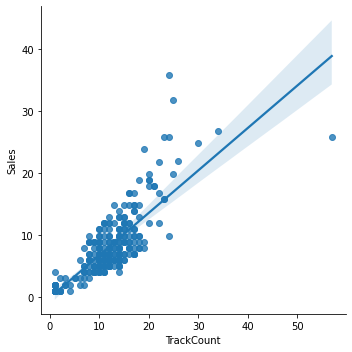

In [35]:
df8_3_plot = sns.lmplot(x='TrackCount', y='Sales', data=df8_3)

df8_3_plot

Therefore, we suggest that the store could conduct clearance of albums with a few tracks and try to import albums with more tracks in the future.

# 3. Customer Filtering

## Q9

### Average expense of customers

To better understand the customers, we will have a look at the average expenses of them, and count how many customers spent lower than the average expense. From the general information and boxplot of customers expenses, we see the average expense of all customers is 39.467797, and a majority of customers spent around 38-39 dollars in total.

In [36]:
# sort the total expenses of all the customers 
query9 = """ 
    SELECT CustomerId, 
           SUM(Total) TotalExpense, 
           (SELECT SUM(Total) / COUNT(DISTINCT CustomerId) FROM invoice) Avg,
           SUM(Total) - (SELECT SUM(Total) / COUNT(DISTINCT CustomerId) FROM invoice) Difference
    FROM invoice 
    GROUP BY CustomerId
    ORDER BY TotalExpense DESC
"""

df9 = pd.read_sql(query9, conn) 

df9

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,TotalExpense,Avg,Difference
0,6,49.62,39.467797,10.152203
1,26,47.62,39.467797,8.152203
2,57,46.62,39.467797,7.152203
3,45,45.62,39.467797,6.152203
4,46,45.62,39.467797,6.152203
5,24,43.62,39.467797,4.152203
6,37,43.62,39.467797,4.152203
7,28,43.62,39.467797,4.152203
8,25,42.62,39.467797,3.152203
9,7,42.62,39.467797,3.152203


<AxesSubplot:xlabel='TotalExpense'>

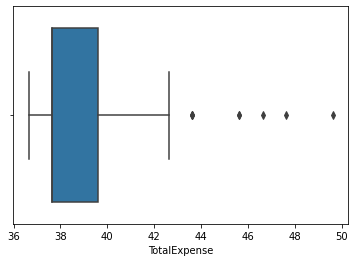

In [37]:
sns.boxplot(x='TotalExpense', data = df9)

In [38]:
# overview of the number and pertange of customers who expensed lower than average
query9_1 = """
    WITH CustomerLowerThanAvg (CustomerId)
    AS(SELECT DISTINCT i1.CustomerId
       FROM invoice i1
       GROUP BY i1.CustomerId
       HAVING SUM(i1.Total) < ( 
              SELECT SUM(i.Total) / COUNT(DISTINCT i.CustomerId)
              FROM invoice i)
        )
    SELECT COUNT(*) CustomerLowerThanAvgCount, 
           (SELECT COUNT(DISTINCT i.CustomerId)
            FROM invoice i) TotalCustomer,
            COUNT(*) / (SELECT COUNT(DISTINCT i.CustomerId) FROM invoice i)*100 Percentage
    FROM CustomerLowerThanAvg
"""

df9_1 = pd.read_sql(query9_1, conn) 

df9_1

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerLowerThanAvgCount,TotalCustomer,Percentage
0,37,59,62.7119


As it shows that more than 60% of customers expensed lower than average expense, the majority of profits were made by a relatively small portion of loyal customers who spent a bit more that covered the difference. It is advised to keep the loyalty with the customers with higher expenses, sending seasonal greetings and promotions are possible ways to keep the bonding with them.

## Q10

### Select the customer who pay the least for purchasing the most tracks

Initially, we would like to categorise customers by country or other conditions to dig in further. However, when we see the purchase number for each customer, we notice a big problem with this database. 

In [39]:
# extract information of total expense and bought track quantity of each customer
query10 = """
    SELECT c.CustomerId, 
           SUM(il.Quantity * il.UnitPrice) TotalExpense, 
           SUM(il.Quantity) Quantity
    FROM customer c
    LEFT JOIN invoice i
    ON c.CustomerId = i.CustomerId
    LEFT JOIN invoiceline il
    ON i.InvoiceId = il.InvoiceId
    GROUP BY c.CustomerId
    ORDER BY SUM(i.Total)
"""

df10 = pd.read_sql(query10, conn)

df10

C:\Users\dawn\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerId,TotalExpense,Quantity
0,59,36.64,36.0
1,54,37.62,38.0
2,13,37.62,38.0
3,36,37.62,38.0
4,27,37.62,38.0
5,18,37.62,38.0
6,50,37.62,38.0
7,9,37.62,38.0
8,41,37.62,38.0
9,32,37.62,38.0


Almost every customer bought the same number of tracks, which seems to be impossible. Therefore, we would like to claim that this database is questionable and suggest that the store should investigate immediately if any problems exist in its point of sale (POS) system.

# Epilogue. Disconnect the Database

In [40]:
db_cursor.close()
conn.close()